## wine data 분류

In [1]:
wine_url="https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"
wine=pd.read_csv(wine_url,index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
#taste 컬럼 생성
wine['taste']=[1. if grade>5 else 0 for grade in wine['quality']]
X=wine.drop(['taste','quality'],axis=1)
y=wine['taste']

In [3]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=27)

In [4]:
#accuracy_score 확인
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression(solver='liblinear', random_state=27)
lr.fit(X_train,y_train)

y_pred_tr=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('Train ACC : ',accuracy_score(y_pred_tr, y_train))
print('test ACC : ',accuracy_score(y_pred_test, y_test))


Train ACC :  0.7452376370983259
test ACC :  0.7276923076923076


In [5]:
#파이프라인구축
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators=[
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=27))
]
pipe=Pipeline(estimators)

In [6]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=27,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [7]:
y_pred_tr=pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)

print('Train ACC : ',accuracy_score(y_pred_tr, y_train))
print('test ACC : ',accuracy_score(y_pred_test, y_test))

Train ACC :  0.7461997306138156
test ACC :  0.7276923076923076


In [8]:
#decision tree와의 비교
from sklearn.tree import DecisionTreeClassifier

wine_tree=DecisionTreeClassifier(max_depth=2,random_state=27)
wine_tree.fit(X_train,y_train)

models={'logistic regression':pipe, 'decision tree':wine_tree}

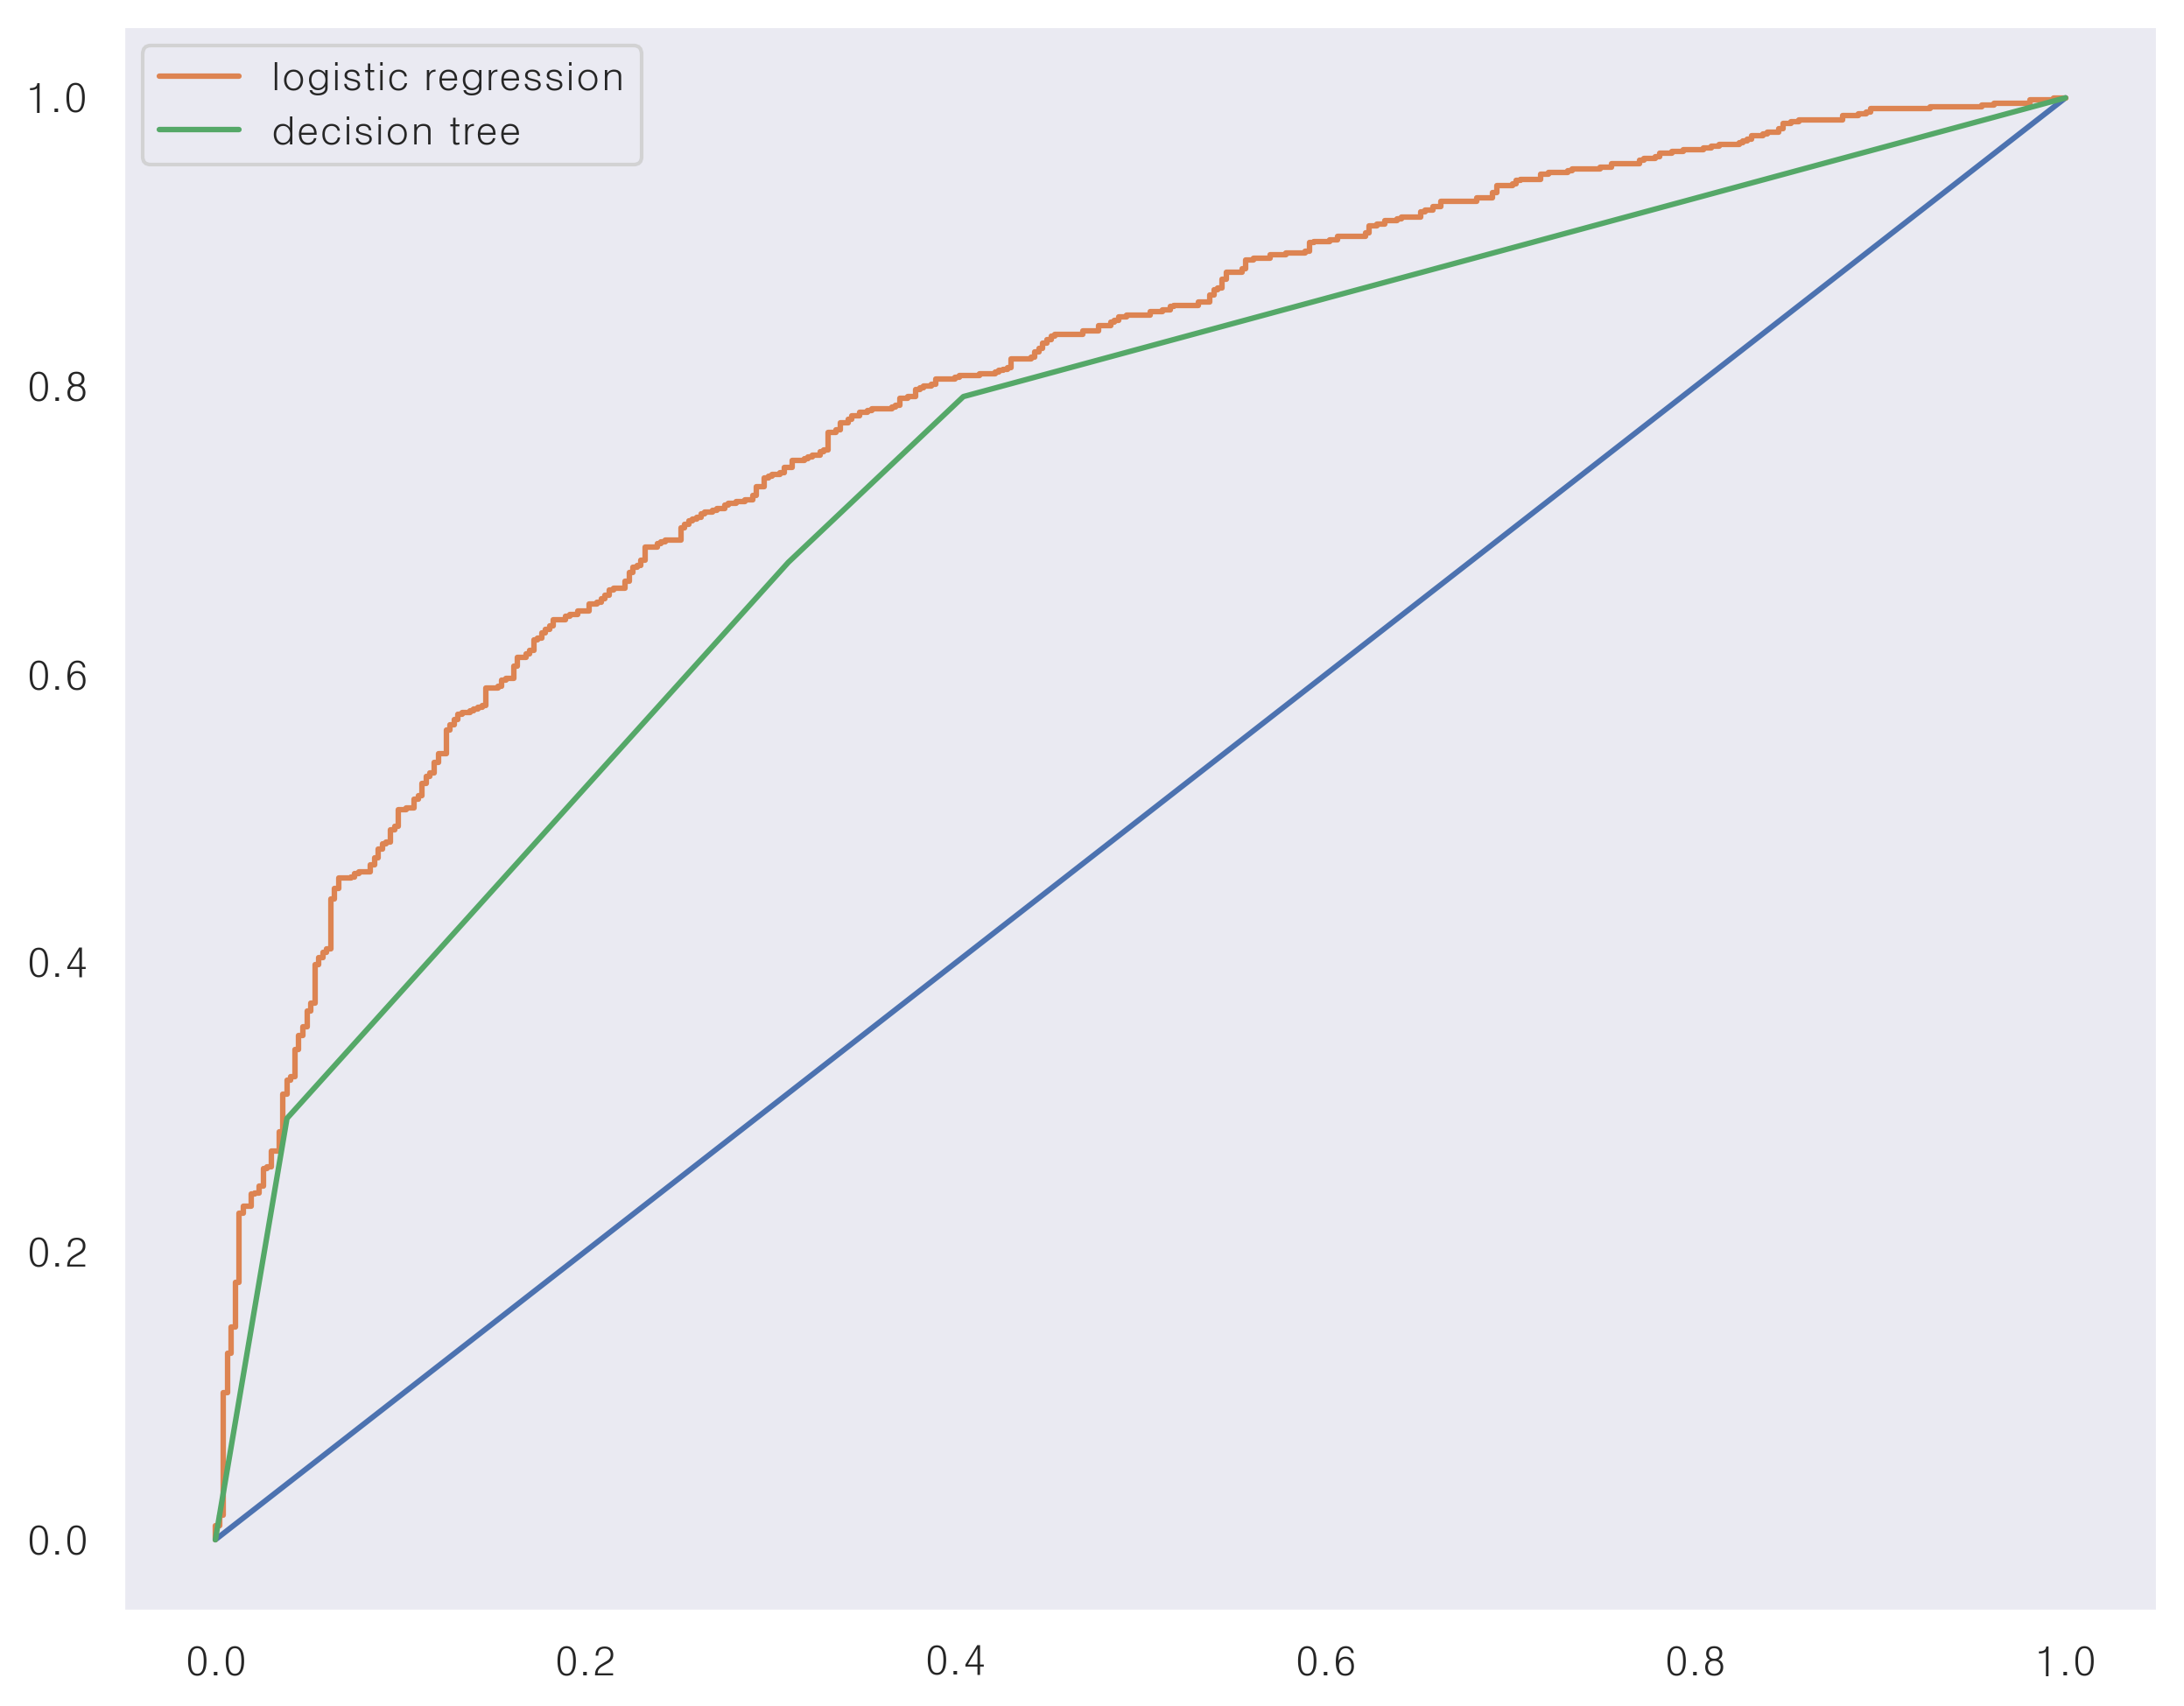

In [9]:
#AUC 그래프를 이용한 모델간 비교
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
for model_name,model in models.items():
    pred=model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot(fpr,tpr,label=model_name)
    
plt.grid()
plt.legend()
plt.show()

logistic regression의 성능이 더 높다

## Pima 당뇨병 예측

In [10]:
PIMA_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
PIMA=pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
PIMA=PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


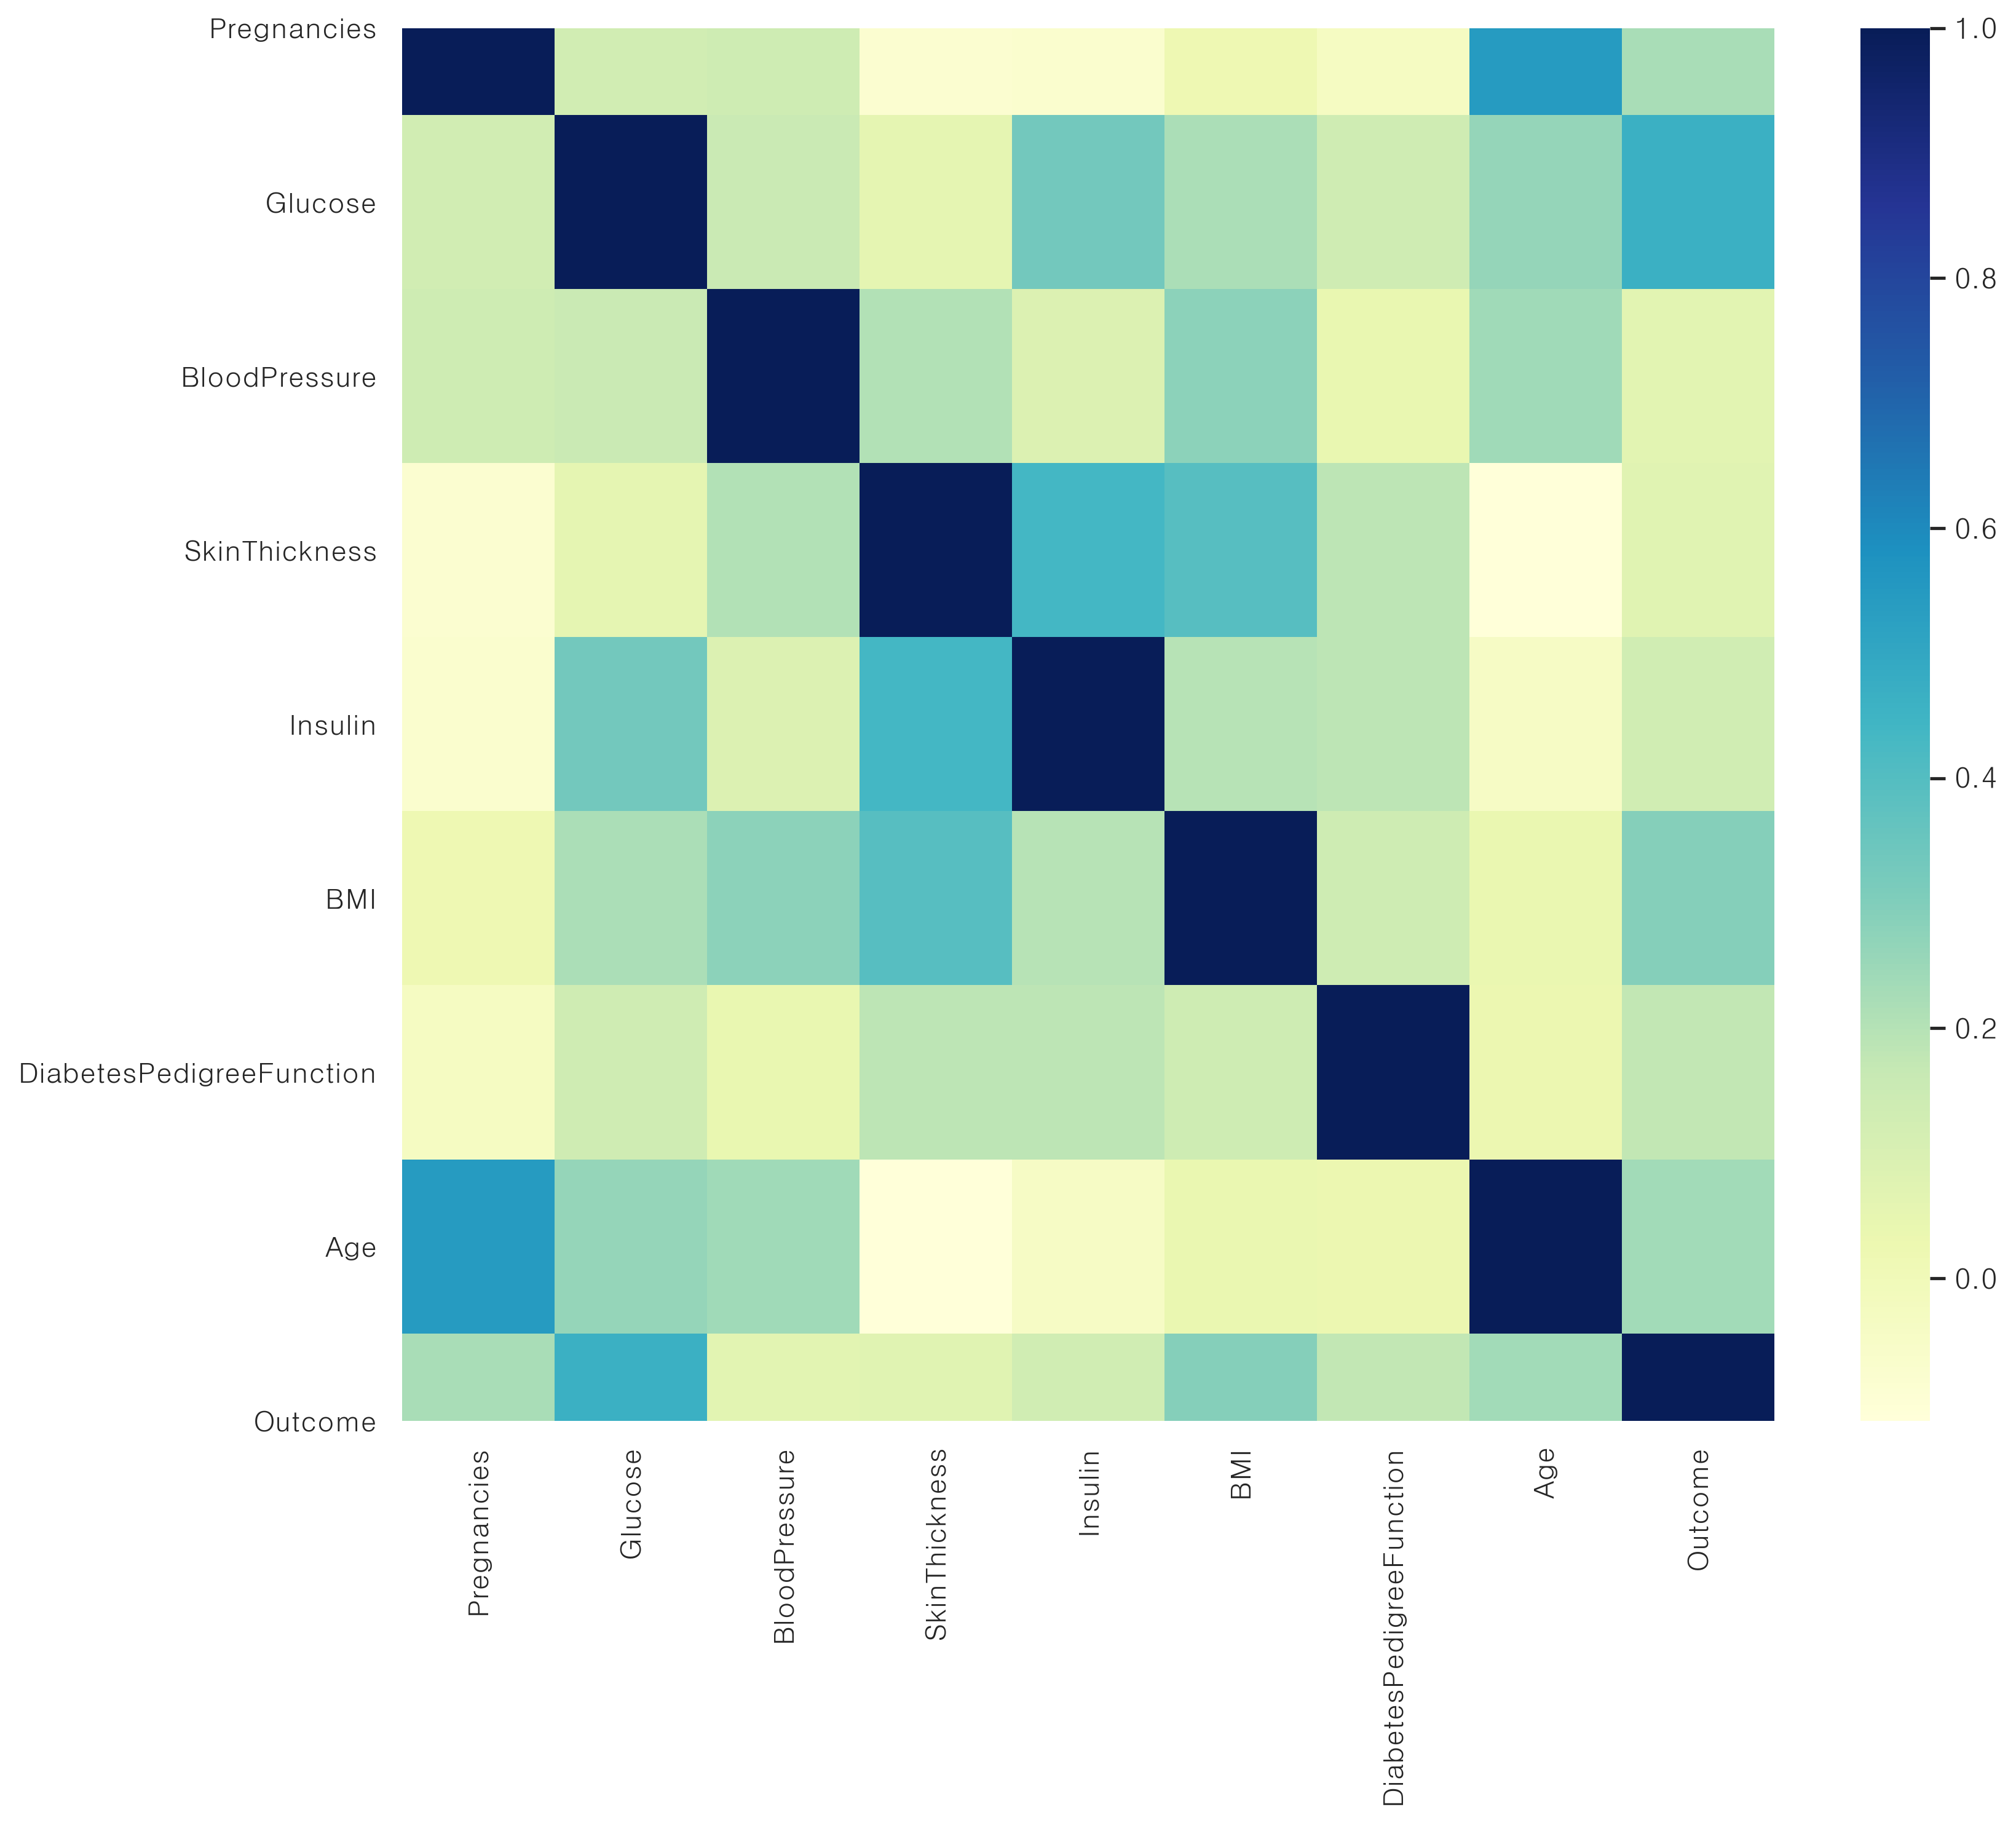

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(),cmap='YlGnBu')
plt.show()

In [14]:
#각 컬럼의 0을 확인하기
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
#의학적지식 및 인디언에대한 정보가 없음으로 일단 평균값으로 대체한다.
zero_features=['Glucose','BloodPressure','SkinThickness','BMI']
PIMA[zero_features]=PIMA[zero_features].replace(0,PIMA[zero_features].mean())

In [16]:
#머신러닝 진행!
X=PIMA.drop(['Outcome'], axis=1)
y=PIMA['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27,stratify=y)


In [17]:
#pipeline
estimators=[
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear', random_state=27))
]
pipe_lr=Pipeline(estimators)
pipe_lr.fit(X_train,y_train)
pred=pipe_lr.predict(X_test)

In [18]:
#성능확인
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score

print('Accuracy: ',accuracy_score(y_test,pred))
print('Recall: ',recall_score(y_test,pred))
print('Precision: ',precision_score(y_test,pred))
print('AUC score: ',roc_auc_score(y_test,pred))
print('f1 score: ',f1_score(y_test,pred))

Accuracy:  0.7402597402597403
Recall:  0.5740740740740741
Precision:  0.6458333333333334
AUC score:  0.702037037037037
f1 score:  0.6078431372549019


상대적 의미를 가질 수 있기 때문에 이 수치자체를 평가할 수 없다
f1 score : precision과 recall 사이의 격차를 알 수 있는 지표이다.
precision과 recall이 둘다 높은지 등을 알 수 있다.

In [19]:
#다변수 방정식의 각 계수 값을 확인
coeff=list(pipe_lr['clf'].coef_[0])
labels=list(X_train.columns)
coeff

[0.4246335171876836,
 1.182115283914967,
 -0.12098805807545683,
 -0.005050037667398086,
 -0.06478828325917493,
 0.683744257159915,
 0.3839437178476026,
 0.19381556750570442]

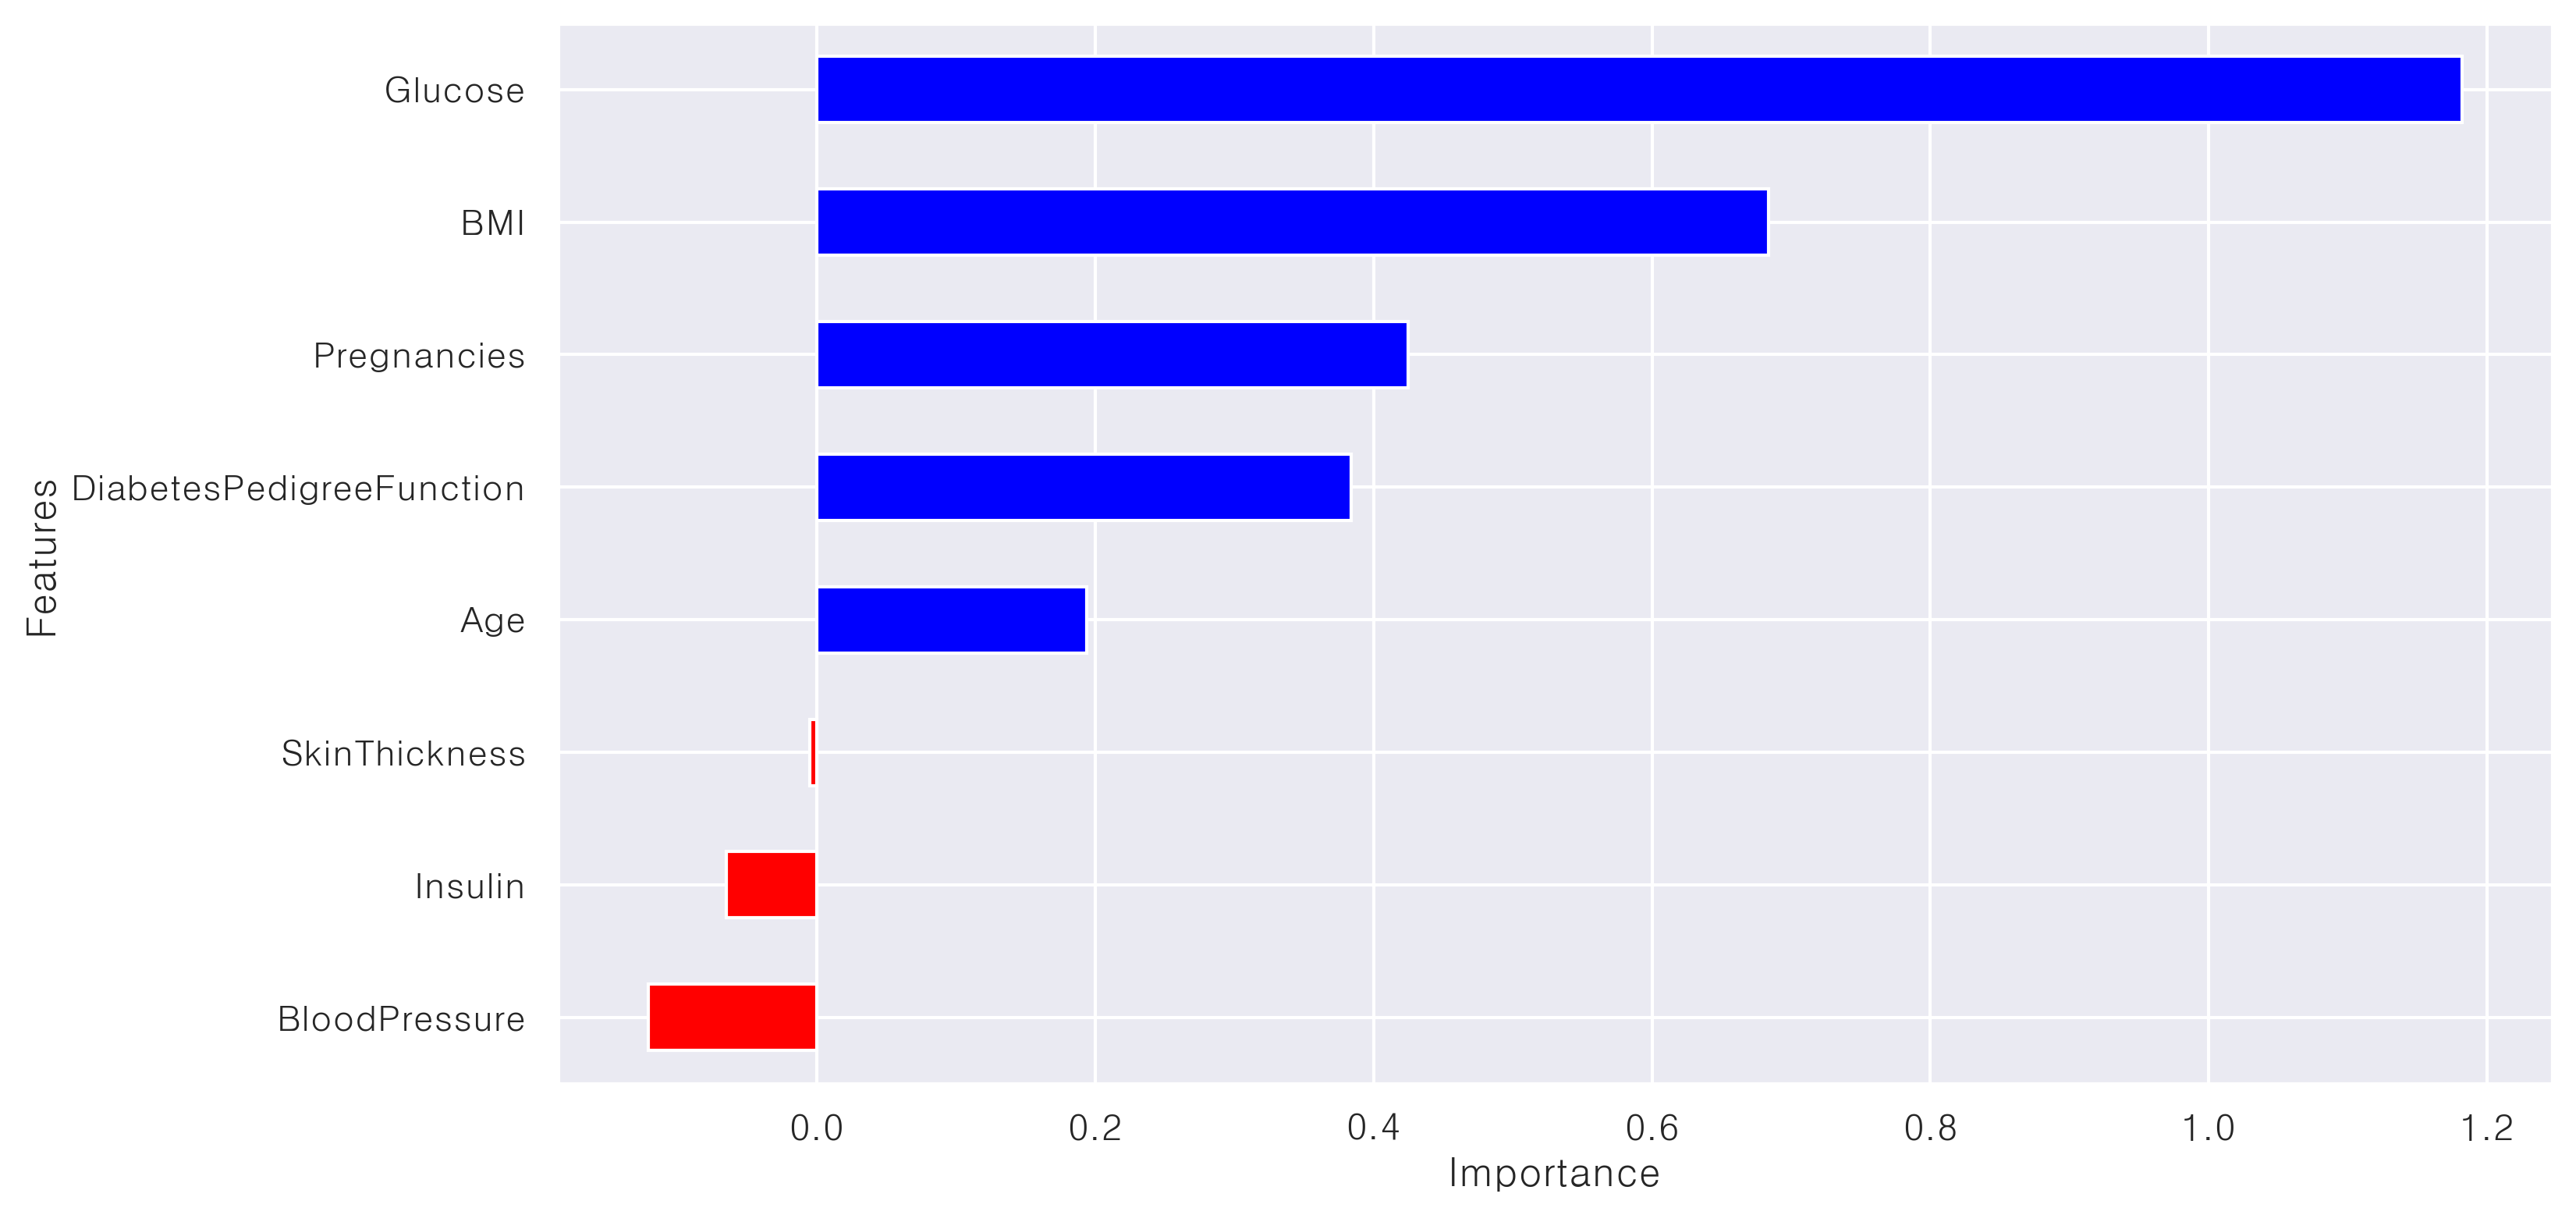

In [20]:
#중요한 feature에 대해 그려보자.
features=pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'],ascending=True, inplace=True)
features['positive']=features['importance']>0
features.set_index('Features',inplace=True)
features['importance'].plot(kind='barh',figsize=(11,6),\
                            color=features['positive'].map({True:'blue', False:'red'}))
plt.xlabel('Importance')
plt.show()